In [1]:
import dask

import xarray as xr
import numpy as np
import pandas as pd
import dask.array as da
import ocetrac


import warnings
warnings.filterwarnings('ignore')
from datetime import date

print('loaded libraries')
import matplotlib.pyplot as plt

loaded libraries


In [2]:
dir_path = "/pub/hfdrake/datasets/CM4_MHW_blobs/"
mt_path = "/pub/mariant3/WarmWaterMasses/02_tracking-mhws"
ds = xr.open_mfdataset(f"{dir_path}/data/ocean_daily_cmip*.nc", chunks={'time':100})

In [3]:
region_tos = ds['tos'].sel(xh=slice(-100, -73), yh=slice(17, 35))

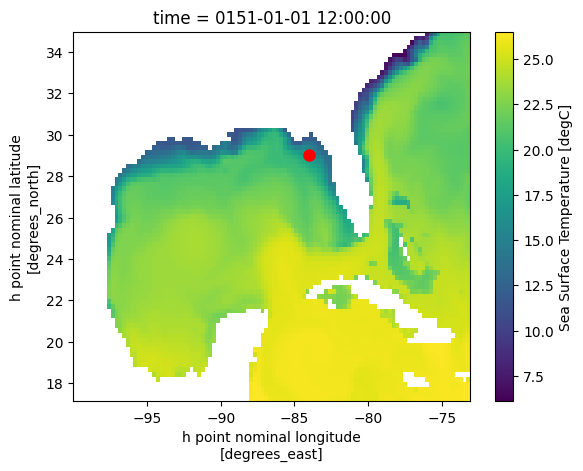

In [4]:
region_tos.isel(time=0).plot()
plt.plot(-84, 29, 'ro', markersize=8)

In [5]:
doy = region_tos['time'].dt.dayofyear
region_climatology = region_tos.groupby(doy).mean(dim='time')
region_climatology

<xarray.DataArray 'tos' (dayofyear: 365, yh: 80, xh: 106)>
dask.array<stack, shape=(365, 80, 106), dtype=float32, chunksize=(1, 80, 106), chunktype=numpy.ndarray>
Coordinates:
  * xh         (xh) float64 -99.87 -99.62 -99.36 -99.11 ... -73.71 -73.45 -73.2
  * yh         (yh) float64 17.23 17.47 17.71 17.95 ... 34.26 34.46 34.67 34.87
  * dayofyear  (dayofyear) int64 1 2 3 4 5 6 7 8 ... 359 360 361 362 363 364 365
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

In [6]:
climatology_dates = xr.DataArray(
    region_climatology.sel(dayofyear=region_tos['time'].dt.dayofyear),
    dims=["time", "yh", "xh"],
    coords={"time": region_tos['time'], "xh": region_tos["xh"], "yh": region_tos["yh"]}
)
climatology_dates

<xarray.DataArray 'tos' (time: 23725, yh: 80, xh: 106)>
dask.array<getitem, shape=(23725, 80, 106), dtype=float32, chunksize=(1, 80, 106), chunktype=numpy.ndarray>
Coordinates:
  * time     (time) object 0151-01-01 12:00:00 ... 0215-12-31 12:00:00
  * xh       (xh) float64 -99.87 -99.62 -99.36 -99.11 ... -73.71 -73.45 -73.2
  * yh       (yh) float64 17.23 17.47 17.71 17.95 ... 34.26 34.46 34.67 34.87
Attributes:
    long_name:      Sea Surface Temperature
    units:          degC
    cell_methods:   area:mean yh:mean xh:mean time: mean
    cell_measures:  area: areacello
    time_avg_info:  average_T1,average_T2,average_DT
    standard_name:  sea_surface_temperature

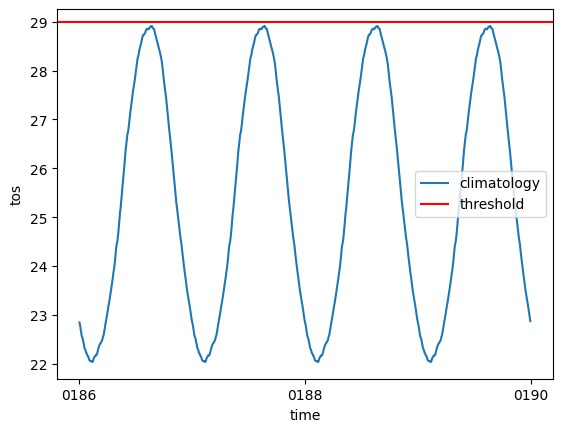

In [8]:
climatology_dates.sel(time=slice("0186","0189")).mean(["xh","yh"]).plot(label="climatology")
plt.axhline(y=29, color='r', linestyle='-',label="threshold")
plt.legend()
plt.show()

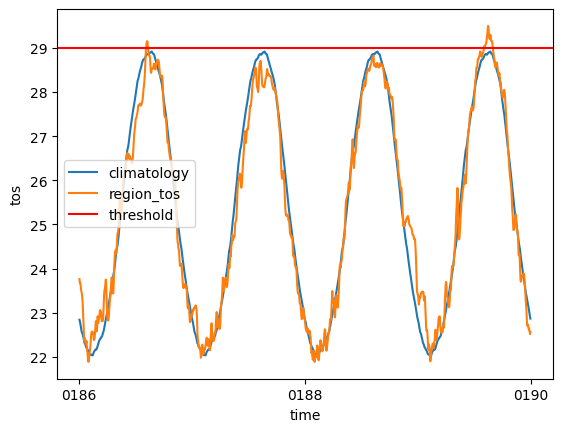

In [7]:
climatology_dates.sel(time=slice("0186","0189")).mean(["xh","yh"]).plot(label="climatology")
region_tos.sel(time=slice("0186","0189")).mean(["xh","yh"]).plot(label="region_tos")
#region_tos.sel(time=slice("0186","0189")).sel(xh="-84",yh="29", method="nearest").plot(label="-84,29")
plt.axhline(y=29, color='r', linestyle='-',label="threshold")
plt.legend()
plt.show()

In [7]:
#climatology_dates.to_netcdf("/pub/mariant3/WarmWaterMasses/data/climatology/climatology-gom-tos-0151-01-01-0215-12-31.nc")